 # Here is my project
 
 Here is some information about my project
 
Acknowledgements:

Kuddos to tomigelo user from Kaggle who's code bits search and audio_features functions from Spotipy (https://www.kaggle.com/tomigelo)

In [27]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_json('/Users/Karolina/ProjectsDataScience/data_science_environment/data/MyDataSpotify/StreamingHistory4.json')

In [8]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2021-10-02 20:31,Surf Mesa,Carried Away (Love To Love) (with Madison Beer),182629
1,2021-10-03 07:33,Mr.Kitty,After Dark,116403
2,2021-10-03 07:33,Khalid,Better,1493
3,2021-10-03 07:37,Khalid,Better,228583
4,2021-10-03 07:41,Khalid,Better,229275


In [56]:
df.artistName.value_counts()


Adele             331
Billie Eilish     291
Taylor Swift      289
James Blake       268
The Weeknd        226
                 ... 
Buckcherry          1
Cheat Codes         1
Punkin Machine      1
Reamonn             1
Tindersticks        1
Name: artistName, Length: 954, dtype: int64

In [57]:
df.groupby(['artistName', 'trackName']).size()


artistName      trackName                   
01099           Frisch                          1
11:11           You                             1
21 Savage       Secret (feat. Summer Walker)    1
3 Doors Down    Here Without You                1
6LACK           First Fuck                      2
                                               ..
t.A.T.u.        All The Things She Said         3
twocolors       Lovefool                        1
vaultboy        everything sucks                1
Ásgeir          Going Home                      1
Ólafur Arnalds  20:17                           1
Length: 2151, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7735 entries, 0 to 7734
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     7735 non-null   object
 1   artistName  7735 non-null   object
 2   trackName   7735 non-null   object
 3   msPlayed    7735 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 241.8+ KB


In [58]:
df.endTime = pd.to_datetime(df.endTime, infer_datetime_format=True) 

In [8]:
df['endTimeHour'] = df.endTime.dt.hour
df['endTimeDate'] = df.endTime.dt.date

In [9]:
df.head(10)

,endTime,artistName,trackName,msPlayed,endTimeHour,endTimeDate
0,2021-10-02 20:31:00,Surf Mesa,Carried Away (Love To Love) (with Madison Beer),182629,20,2021-10-02
1,2021-10-03 07:33:00,Mr.Kitty,After Dark,116403,7,2021-10-03
2,2021-10-03 07:33:00,Khalid,Better,1493,7,2021-10-03
3,2021-10-03 07:37:00,Khalid,Better,228583,7,2021-10-03
4,2021-10-03 07:41:00,Khalid,Better,229275,7,2021-10-03
5,2021-10-03 07:44:00,Khalid,Better,194119,7,2021-10-03
6,2021-10-03 07:48:00,Taylor Swift,Wildest Dreams (Taylor's Version),220390,7,2021-10-03
7,2021-10-03 07:51:00,Taylor Swift,Wildest Dreams (Taylor's Version),220390,7,2021-10-03
8,2021-10-03 07:55:00,Taylor Swift,Wildest Dreams (Taylor's Version),220390,7,2021-10-03
9,2021-10-03 08:22:00,CKay,love nwantiti (ah ah ah),2560,8,2021-10-03


In [30]:
%matplotlib inline

In [62]:
# Prepare data
x_var = 'endTimeDate'
groupby_var = 'endTimeHour'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]
labels = np.unique(df[groupby_var]).tolist()

In [41]:
df_agg.describe()

endTimeDate                        
                  count unique         top freq
endTimeHour                                    
0                     1      1  2021-11-12    1
3                    13      2  2021-10-05   10
4                    73      5  2021-10-05   25
5                   280     14  2021-10-13   60
6                   576     31  2021-10-04   90
7                   741     45  2021-10-16   58
8                   562     47  2021-10-23   39
9                   532     43  2021-11-01   45
10                  383     36  2021-10-23   39
11                  354     38  2021-10-05   28
12                  461     35  2021-11-08   65
13                  501     37  2021-11-14   49
14                  373     32  2021-11-07   52
15                  628     40  2021-11-07   86
16                  517     36  2021-11-08   40
17                  321     35  2021-11-07   37
18                  425     37  2021-10-24   60
19                  355     35  2021-10-15   36
20                  300     31  2021-10-30   34
21                  189     23  2021-10-07   21
22                  119     17  2021-10-30   26
23                   31      3  2021-11-14   19

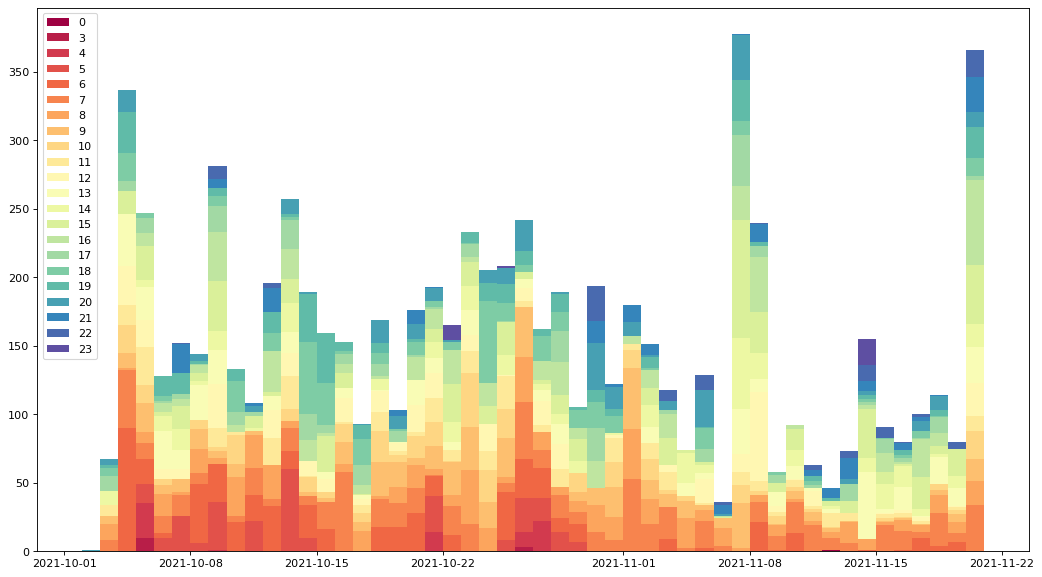

In [79]:
#Plot
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
plt.hist(vals, df[x_var].unique(), stacked=True, density=False, color=colors)
# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")

plt.show()

This doesn't make much sense as it would indicate that I do listen to a lot of music during he night between midnight and 6/7 am. Assumption after reading data documentation is that the timestimes might be in Pacific Standard Time that is used in state of California. Let's change it to the European timezone and rerun the graph

In [59]:
from datetime import datetime
from pytz import timezone

In [71]:
#Set the current time to US Pacific timezone
df['endTimeTz']= df.endTime.dt.tz_localize(tz='UTC')

#convert US Pacific to Europe/Berlin Timezone
df['endTimeTzEU']=df.endTimeTz.dt.tz_convert(tz='Europe/Berlin')

df['endTimeHourEU'] = df.endTimeTzEU.dt.hour
df['endTimeDateEU'] = df.endTimeTzEU.dt.date

In [72]:
df.head()

,endTime,artistName,trackName,msPlayed,endTimeTz,endTimeTzEU,endTimeHourEU,endTimeDateEU
0,2021-10-02 20:31:00,Surf Mesa,Carried Away (Love To Love) (with Madison Beer),182629,2021-10-02 20:31:00+00:00,2021-10-02 22:31:00+02:00,22,2021-10-02
1,2021-10-03 07:33:00,Mr.Kitty,After Dark,116403,2021-10-03 07:33:00+00:00,2021-10-03 09:33:00+02:00,9,2021-10-03
2,2021-10-03 07:33:00,Khalid,Better,1493,2021-10-03 07:33:00+00:00,2021-10-03 09:33:00+02:00,9,2021-10-03
3,2021-10-03 07:37:00,Khalid,Better,228583,2021-10-03 07:37:00+00:00,2021-10-03 09:37:00+02:00,9,2021-10-03
4,2021-10-03 07:41:00,Khalid,Better,229275,2021-10-03 07:41:00+00:00,2021-10-03 09:41:00+02:00,9,2021-10-03


In [73]:
# Prepare data
x_var = 'endTimeDateEU'
groupby_var = 'endTimeHourEU'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]
labels = np.unique(df[groupby_var]).tolist()

In [74]:
freq = df.groupby('endTimeHourEU').count()

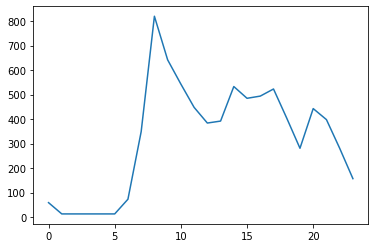

In [75]:
plt.plot(freq)
plt.show()

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid = '0c4df4418a2e4290b3a4d7751665a215'
secret = 'ef84184c71b54774ab7cd04998973eca'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [2]:
artistName = 'Mr.Kitty'
trackName = 'After Dark'
searchQuery = trackName + ' ' + artistName
searchResults = sp.search(q=searchQuery, market="DE", limit=1, type='track')

In [3]:
track_id = searchResults['tracks']['items'][0]['id']

In [4]:
sp.audio_features(tracks=[track_id])

[{'danceability': 0.585,
  'energy': 0.595,
  'key': 8,
  'loudness': -10.444,
  'mode': 1,
  'speechiness': 0.0328,
  'acousticness': 0.0696,
  'instrumentalness': 0.266,
  'liveness': 0.0837,
  'valence': 0.039,
  'tempo': 140.037,
  'type': 'audio_features',
  'id': '2LKOHdMsL0K9KwcPRlJK2v',
  'uri': 'spotify:track:2LKOHdMsL0K9KwcPRlJK2v',
  'track_href': 'https://api.spotify.com/v1/tracks/2LKOHdMsL0K9KwcPRlJK2v',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2LKOHdMsL0K9KwcPRlJK2v',
  'duration_ms': 259147,
  'time_signature': 4}]

In [36]:
search_list = df[['artistName', 'trackName']].drop_duplicates(ignore_index=True)

In [37]:
search_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artistName  2151 non-null   object
 1   trackName   2151 non-null   object
dtypes: object(2)
memory usage: 33.7+ KB


In [38]:
# timeit library to measure the time needed to run this code
import timeit
start = timeit.default_timer()


# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []

for row in search_list.iterrows():
    searchQuery = row[1][1] + ' ' + row[1][0]
    #print(searchQuery)
    search_results = sp.search(q=searchQuery, market="DE", limit=1, type='track')
    for i, t in enumerate(search_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Time to run this code (in seconds): 461.885602069


In [39]:
df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
print(df_tracks.shape)
df_tracks.head(15)

(2130, 4)


,artist_name,track_name,track_id,popularity
0,Surf Mesa,Carried Away (Love To Love) (with Madison Beer),4IvuPZogXbY7LODs7qzr0W,68
1,Mr.Kitty,After Dark,2LKOHdMsL0K9KwcPRlJK2v,82
2,Khalid,Better,4T3fNx3CgwDRRYgmFCbD4J,74
3,Taylor Swift,Wildest Dreams (Taylor's Version),1Ov37jtRQ2YNAe8HzfczkL,86
4,CKay,love nwantiti (ah ah ah),2Xr1dTzJee307rmrkt8c0g,93
5,Kehlani,Altar,501mFwKeLnybf8JO3XL66O,73
6,Rihanna,Sex With Me,7BiELrM90hRxpozaIXbsLw,75
7,NEL,In Case You Change Your Mind,0qnnEX0D8Vzx4URbx0nlKJ,5
8,Skrillex,Don’t Go (with Justin Bieber & Don Toliver),55sgQENF3LY1sUcJUwasLl,75
9,WizKid,Essence (feat. Justin Bieber & Tems),1mSdbey7RstGLY2udgXv74,75


In [40]:
# again measuring the time
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Number of tracks where no audio features were available: 1
Time to run this code (in seconds): 3.7888905810000324


In [41]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (2129, 18)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.518,0.683,1,-5.295,1,0.0364,0.3460,0.00000,0.3110,0.304,141.971,audio_features,4IvuPZogXbY7LODs7qzr0W,spotify:track:4IvuPZogXbY7LODs7qzr0W,https://api.spotify.com/v1/tracks/4IvuPZogXbY7...,https://api.spotify.com/v1/audio-analysis/4Ivu...,182654,4
1,0.585,0.595,8,-10.444,1,0.0328,0.0696,0.26600,0.0837,0.039,140.037,audio_features,2LKOHdMsL0K9KwcPRlJK2v,spotify:track:2LKOHdMsL0K9KwcPRlJK2v,https://api.spotify.com/v1/tracks/2LKOHdMsL0K9...,https://api.spotify.com/v1/audio-analysis/2LKO...,259147,4
2,0.442,0.585,0,-10.332,0,0.0964,0.0984,0.39100,0.1400,0.116,97.565,audio_features,4T3fNx3CgwDRRYgmFCbD4J,spotify:track:4T3fNx3CgwDRRYgmFCbD4J,https://api.spotify.com/v1/tracks/4T3fNx3CgwDR...,https://api.spotify.com/v1/audio-analysis/4T3f...,229413,4
3,0.583,0.670,8,-7.289,1,0.0646,0.0374,0.00010,0.1260,0.498,140.061,audio_features,1Ov37jtRQ2YNAe8HzfczkL,spotify:track:1Ov37jtRQ2YNAe8HzfczkL,https://api.spotify.com/v1/tracks/1Ov37jtRQ2YN...,https://api.spotify.com/v1/audio-analysis/1Ov3...,220433,4
4,0.727,0.739,8,-3.805,1,0.0411,0.3650,0.00137,0.1610,0.533,93.005,audio_features,2Xr1dTzJee307rmrkt8c0g,spotify:track:2Xr1dTzJee307rmrkt8c0g,https://api.spotify.com/v1/tracks/2Xr1dTzJee30...,https://api.spotify.com/v1/audio-analysis/2Xr1...,145800,4


In [42]:
columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features.drop(columns_to_drop, axis=1,inplace=True)

df_audio_features.rename(columns={'id': 'track_id'}, inplace=True)

df_audio_features.shape

(2129, 14)

In [43]:
# merge both dataframes
# the 'inner' method will make sure that we only keep track IDs present in both datasets
df_tracks_catalog = pd.merge(df_tracks,df_audio_features,on='track_id',how='inner')
print("Shape of the dataset:", df_audio_features.shape)
df_tracks_catalog.head()

Shape of the dataset: (2129, 14)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Surf Mesa,Carried Away (Love To Love) (with Madison Beer),4IvuPZogXbY7LODs7qzr0W,68,0.518,0.683,1,-5.295,1,0.0364,0.3460,0.00000,0.3110,0.304,141.971,182654,4
1,Mr.Kitty,After Dark,2LKOHdMsL0K9KwcPRlJK2v,82,0.585,0.595,8,-10.444,1,0.0328,0.0696,0.26600,0.0837,0.039,140.037,259147,4
2,Khalid,Better,4T3fNx3CgwDRRYgmFCbD4J,74,0.442,0.585,0,-10.332,0,0.0964,0.0984,0.39100,0.1400,0.116,97.565,229413,4
3,Taylor Swift,Wildest Dreams (Taylor's Version),1Ov37jtRQ2YNAe8HzfczkL,86,0.583,0.670,8,-7.289,1,0.0646,0.0374,0.00010,0.1260,0.498,140.061,220433,4
4,CKay,love nwantiti (ah ah ah),2Xr1dTzJee307rmrkt8c0g,93,0.727,0.739,8,-3.805,1,0.0411,0.3650,0.00137,0.1610,0.533,93.005,145800,4


In [44]:
today = datetime.date.today().strftime("%Y%m%d")
#df_tracks_catalog.to_csv(f'{today}_spotifyt_tracks_catalog.csv')

In [45]:
df_tracks_catalog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2151 entries, 0 to 2150
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       2151 non-null   object 
 1   track_name        2151 non-null   object 
 2   track_id          2151 non-null   object 
 3   popularity        2151 non-null   int64  
 4   danceability      2151 non-null   float64
 5   energy            2151 non-null   float64
 6   key               2151 non-null   int64  
 7   loudness          2151 non-null   float64
 8   mode              2151 non-null   int64  
 9   speechiness       2151 non-null   float64
 10  acousticness      2151 non-null   float64
 11  instrumentalness  2151 non-null   float64
 12  liveness          2151 non-null   float64
 13  valence           2151 non-null   float64
 14  tempo             2151 non-null   float64
 15  duration_ms       2151 non-null   int64  
 16  time_signature    2151 non-null   int64  


In [46]:
df_tracks_catalog.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Surf Mesa,Carried Away (Love To Love) (with Madison Beer),4IvuPZogXbY7LODs7qzr0W,68,0.518,0.683,1,-5.295,1,0.0364,0.3460,0.00000,0.3110,0.304,141.971,182654,4
1,Mr.Kitty,After Dark,2LKOHdMsL0K9KwcPRlJK2v,82,0.585,0.595,8,-10.444,1,0.0328,0.0696,0.26600,0.0837,0.039,140.037,259147,4
2,Khalid,Better,4T3fNx3CgwDRRYgmFCbD4J,74,0.442,0.585,0,-10.332,0,0.0964,0.0984,0.39100,0.1400,0.116,97.565,229413,4
3,Taylor Swift,Wildest Dreams (Taylor's Version),1Ov37jtRQ2YNAe8HzfczkL,86,0.583,0.670,8,-7.289,1,0.0646,0.0374,0.00010,0.1260,0.498,140.061,220433,4
4,CKay,love nwantiti (ah ah ah),2Xr1dTzJee307rmrkt8c0g,93,0.727,0.739,8,-3.805,1,0.0411,0.3650,0.00137,0.1610,0.533,93.005,145800,4


In [52]:
sample = df_tracks_catalog[df_tracks_catalog['artist_name'].str.contains('The Weeknd')]
sample.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
42,The Weeknd,Take My Breath,6OGogr19zPTM4BALXuMQpF,84,0.748,0.740,8,-6.010,1,0.0484,0.0107,0.000022,0.1010,0.518,121.004,220196,4
145,The Weeknd,A Lonely Night,0ifooM33X1iBxVYyOkSbXW,69,0.853,0.663,7,-6.955,0,0.0755,0.0431,0.000009,0.0891,0.864,113.998,220173,4
185,The Weeknd,The Morning - Original,4jBfUB4kQJCWOrjGLQqhO0,60,0.682,0.510,6,-9.987,0,0.0441,0.1430,0.000004,0.0797,0.191,120.097,314110,4
186,The Weeknd,The Morning - Original,4jBfUB4kQJCWOrjGLQqhO0,60,0.682,0.510,6,-9.987,0,0.0441,0.1430,0.000004,0.0797,0.191,120.097,314110,4
187,The Weeknd,The Morning - Original,4jBfUB4kQJCWOrjGLQqhO0,60,0.682,0.510,6,-9.987,0,0.0441,0.1430,0.000004,0.0797,0.191,120.097,314110,4


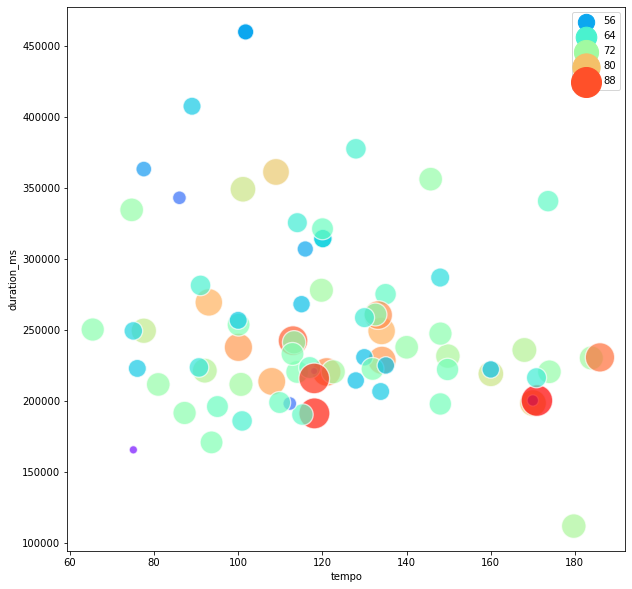

In [54]:
plt.figure(figsize=(10,10))

ax = sns.scatterplot(data=sample, x='tempo', y='duration_ms', 
                     hue='popularity', palette='rainbow', 
                     size='popularity', sizes=(50,1000), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:10], labs[1:10], loc='best', title=None)

In [55]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2021-10-02 20:31,Surf Mesa,Carried Away (Love To Love) (with Madison Beer),182629
1,2021-10-03 07:33,Mr.Kitty,After Dark,116403
2,2021-10-03 07:33,Khalid,Better,1493
3,2021-10-03 07:37,Khalid,Better,228583
4,2021-10-03 07:41,Khalid,Better,229275
